## Process Data

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
#load the data
df = pd.read_csv("file:///Users/zhongyan/Downloads/DS%20Challenge%20Datasets/Conversion_Rate/conversion_project.csv")

In [123]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [124]:
df.info()
#There are no missing values in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [125]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In the age column, max value is 123, which is unreasonable, so there may be some outliers in the dataset that need to be handled. We will remove the rows where the age is greater than 100.

In [126]:
df = df.loc[df['age'] <= 100]

## Visualize Data

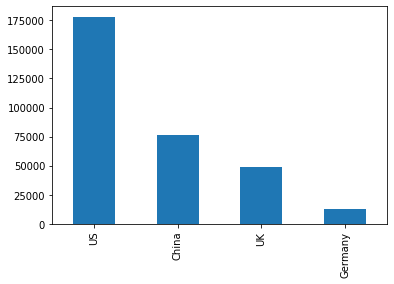

In [127]:
byCountry = df['country'].value_counts()
byCountry.plot(kind = 'bar')

In terms of country, US has the largest customer population, and German has the smallerst population. We want to further investigate the conversion rate by country.

In [128]:
df[["country", "converted"]].groupby("country").mean()

,converted
country,
China,0.001332
Germany,0.062428
UK,0.052612
US,0.037801


We see that the conversion rate in China is significantly low compared to its large populations, and Germany has the highest conversion rate.

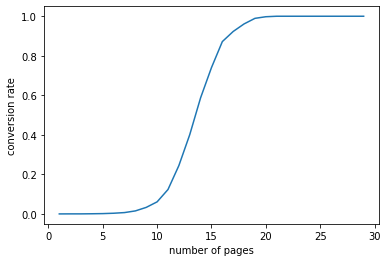

In [129]:
conv_page = df[["total_pages_visited", "converted"]].groupby("total_pages_visited").mean()
plt.plot(conv_page['converted'])
plt.ylabel('conversion rate')
plt.xlabel('number of pages')
plt.show()

We see that the conversion rate increases as the number of pages browsed increases.

## Predict Conversion

Now, let's build a machine learning model to predict the conversion. I use random forest since it is a tree model which is fairly robust, and the default parameters usually yield good results. If given more time, I will take time to tune the parameters using GridSearch to achieve better result.

We first need to convert categorical data into integers using dummies, and then split the train and test set.

In [136]:
features = df.loc[:, ("country", "age", "new_user", "source", "total_pages_visited")]
features = pd.get_dummies(features)
target = df.loc[:,'converted']
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=6)
print(len(features_train))
print(len(features_test))

252958
63240


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(features_train, target_train)
rf_pred = rf_model.predict(features_test)
print(classification_report(y_true = target_test, y_pred = rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61151
           1       0.82      0.66      0.74      2089

   micro avg       0.98      0.98      0.98     63240
   macro avg       0.91      0.83      0.86     63240
weighted avg       0.98      0.98      0.98     63240



In [153]:
print(rf_model.feature_importances_)
#We see the age column is the most important feature.

[0.11154641 0.03809557 0.81108452 0.02231452 0.00263164 0.00332734
 0.00389793 0.00225329 0.00237956 0.00246922]



Since we are predicting conversion rate, we cannot only look at accuracy because the converted one only take up about 1-6%, if we classify everything as non-converted, we can still get an accuracy of 94% at worst. Thus, we also need to look at recall and precision, out of all converted customers, we can correctly classify 66% of them, and we do better at the non-converted customers. 

If given more time, I will split the dataset into train, validation, and test sets, so I can train on multiple models, and also take time to tune the hyper-parameters to optimize the model performance.

## Conclusion

* In terms of country, we China has the lowest conversion rate compared to its population, we need to check if the website is translated well into Chinese, or if the design is suitable in Chinese culture.

* The conversion rate is also closely related to the number of pages viewed.

* We should target more on younger customers and try to increase the retention rate of the younger customers by sending them promo code or referral link.